In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
df = pd.read_csv('ToyotaCorolla.csv')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(1436, 38)

In [6]:
df = df[['Price','Age_08_04','HP','KM','cc','Doors','Gears','Quarterly_Tax','Weight']]
df

,Price,Age_08_04,HP,KM,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,90,46986,2000,3,5,210,1165
1,13750,23,90,72937,2000,3,5,210,1165
2,13950,24,90,41711,2000,3,5,210,1165
3,14950,26,90,48000,2000,3,5,210,1165
4,13750,30,90,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,86,20544,1300,3,5,69,1025
1432,10845,72,86,19000,1300,3,5,69,1015
1433,8500,71,86,17016,1300,3,5,69,1015
1434,7250,70,86,16916,1300,3,5,69,1015


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   HP             1436 non-null   int64
 3   KM             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
data= df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data

,Price,Age,HP,KM,CC,Doors,Gears,QT,Weight
0,13500,23,90,46986,2000,3,5,210,1165
1,13750,23,90,72937,2000,3,5,210,1165
2,13950,24,90,41711,2000,3,5,210,1165
3,14950,26,90,48000,2000,3,5,210,1165
4,13750,30,90,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,86,20544,1300,3,5,69,1025
1432,10845,72,86,19000,1300,3,5,69,1015
1433,8500,71,86,17016,1300,3,5,69,1015
1434,7250,70,86,16916,1300,3,5,69,1015


In [9]:
data.isnull().sum()

Price     0
Age       0
HP        0
KM        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [10]:
data.duplicated().sum()

1

In [11]:
data[data.duplicated()] 

,Price,Age,HP,KM,CC,Doors,Gears,QT,Weight
113,24950,8,116,13253,2000,5,5,234,1320


In [12]:
data[~data.duplicated()] 

,Price,Age,HP,KM,CC,Doors,Gears,QT,Weight
0,13500,23,90,46986,2000,3,5,210,1165
1,13750,23,90,72937,2000,3,5,210,1165
2,13950,24,90,41711,2000,3,5,210,1165
3,14950,26,90,48000,2000,3,5,210,1165
4,13750,30,90,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,86,20544,1300,3,5,69,1025
1432,10845,72,86,19000,1300,3,5,69,1015
1433,8500,71,86,17016,1300,3,5,69,1015
1434,7250,70,86,16916,1300,3,5,69,1015


In [13]:
data.describe()

,Price,Age,HP,KM,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,101.502089,68533.259749,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,14.981080,37506.448872,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,69.000000,1.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,90.000000,43000.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,110.000000,63389.500000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,110.000000,87020.750000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,192.000000,243000.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# correlation analysis

In [14]:
data.corr()

,Price,Age,HP,KM,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,0.314990,-0.569960,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,-0.156622,0.505672,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
HP,0.314990,-0.156622,1.000000,-0.333538,0.035856,0.092424,0.209477,-0.298432,0.089614
KM,-0.569960,0.505672,-0.333538,1.000000,0.102683,-0.036197,0.015023,0.278165,-0.028598
CC,0.126389,-0.098084,0.035856,0.102683,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,0.092424,-0.036197,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.209477,0.015023,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,-0.298432,0.278165,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,0.089614,-0.028598,0.335637,0.302618,0.020613,0.626134,1.000000


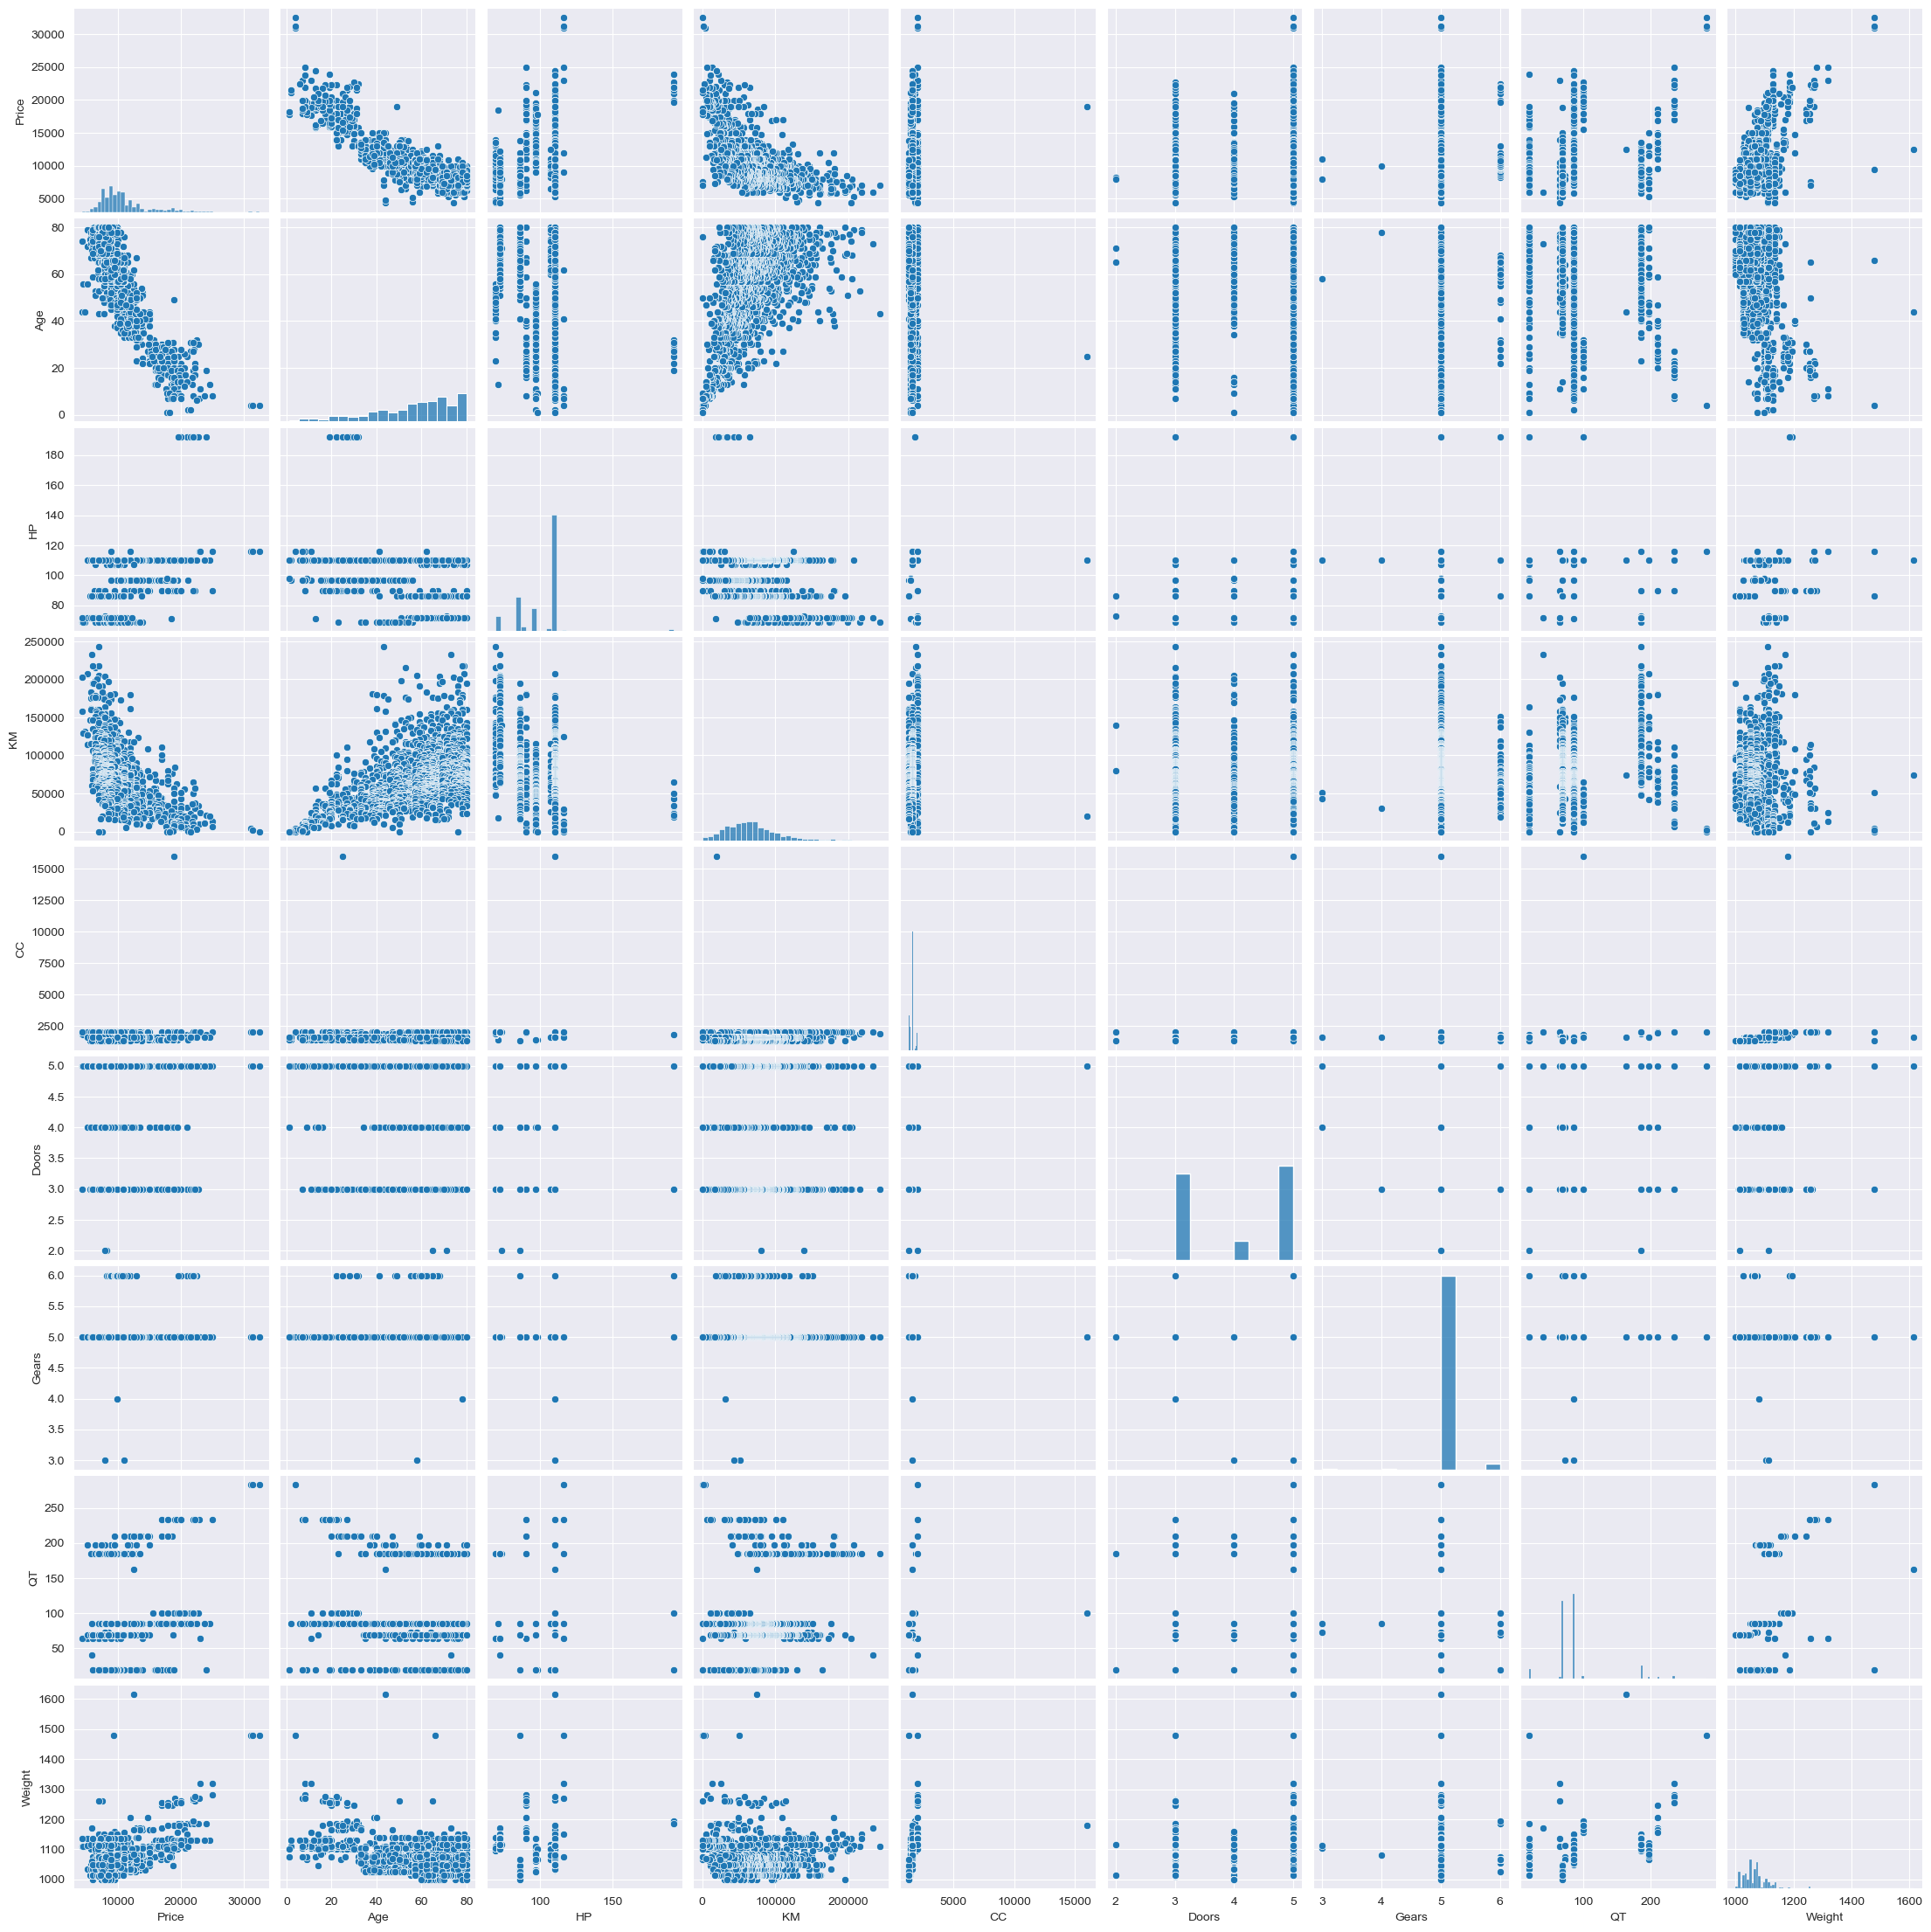

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [16]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+HP+KM+CC+Doors+Gears+QT+Weight',data = data).fit()

In [17]:
model.rsquared

0.8637627463428192

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:03:34   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
HP            31.6809      2.818     11.241      0.000      26.152      37.209
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
CC            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
import statsmodels.formula.api as smf
model_door = smf.ols('Price~Doors',data = data).fit()

In [20]:
model_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.46e-12
Time:                        13:03:34   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
import statsmodels.formula.api as smf
model_CC = smf.ols('Price~CC',data = data).fit()

In [22]:
model_CC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.55e-06
Time:                        13:03:35   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
CC             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model_CD = smf.ols('Price~Doors+CC',data = data).fit()

In [24]:
model_CD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.15e-15
Time:                        13:03:35   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
CC             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
rsq_Age = smf.ols('Age~HP+KM+CC+Doors+Gears+QT+Weight',data = data).fit().rsquared
vif_Age =1/ (1-rsq_Age)
rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data = data).fit().rsquared
vif_HP =1/ (1-rsq_HP)
rsq_KM= smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data = data).fit().rsquared
vif_KM =1/ (1-rsq_KM)
rsq_CC = smf.ols('CC~KM+Age+HP+Doors+Gears+QT+Weight',data = data).fit().rsquared
vif_CC =1/ (1-rsq_CC)
rsq_Doors = smf.ols('Doors~Age+HP+KM+CC+Gears+QT+Weight',data = data).fit().rsquared
vif_Doors =1/ (1-rsq_Doors)
rsq_Gears = smf.ols('Gears~HP+Age+KM+CC+Doors+QT+Weight',data = data).fit().rsquared
vif_Gears =1/ (1-rsq_Gears)
rsq_QT = smf.ols('QT~KM+Age+HP+CC+Doors+Gears+Weight',data = data).fit().rsquared
vif_QT =1/ (1-rsq_QT)
rsq_Weight = smf.ols('Weight~CC+KM+Age+HP+Doors+Gears+QT',data = data).fit().rsquared
vif_Weight =1/ (1-rsq_Weight)

In [26]:
df1 =d1 = {'variables':['Age','HP','KM','CC','Doors','Gears','QT','Weight'],'VIF':[vif_Age,vif_HP,vif_KM,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
vif_frame = pd.DataFrame(df1)


In [27]:
vif_frame 

,variables,VIF
0,Age,1.884620
1,HP,1.419422
2,KM,1.756905
3,CC,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


# Residual analysis

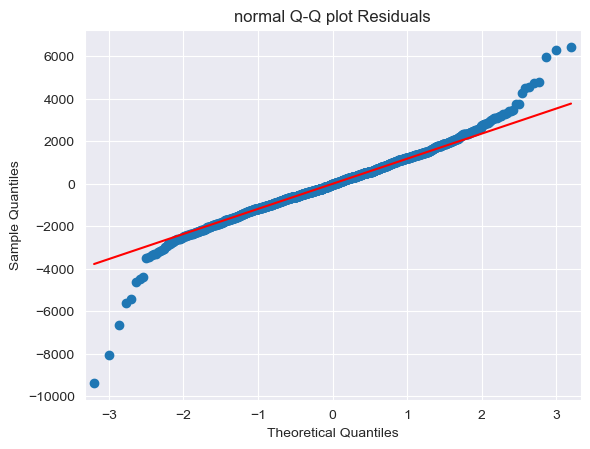

In [28]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title('normal Q-Q plot Residuals')
plt.show()

In [29]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [30]:
list(np.where(model.resid<6000))

[array([   0,    1,    2, ..., 1433, 1434, 1435], dtype=int64)]

In [31]:
def get_standardized_values(vals):
    return(vals-vals.mean()/vals.std())

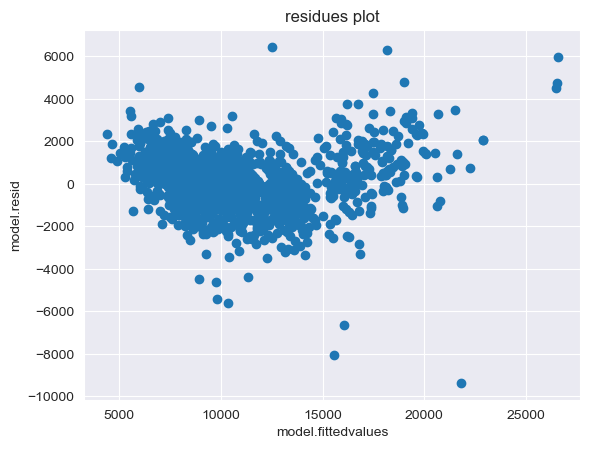

In [32]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('residues plot')
plt.xlabel('model.fittedvalues')
plt.ylabel('model.resid')
plt.show()

eval_env: 1


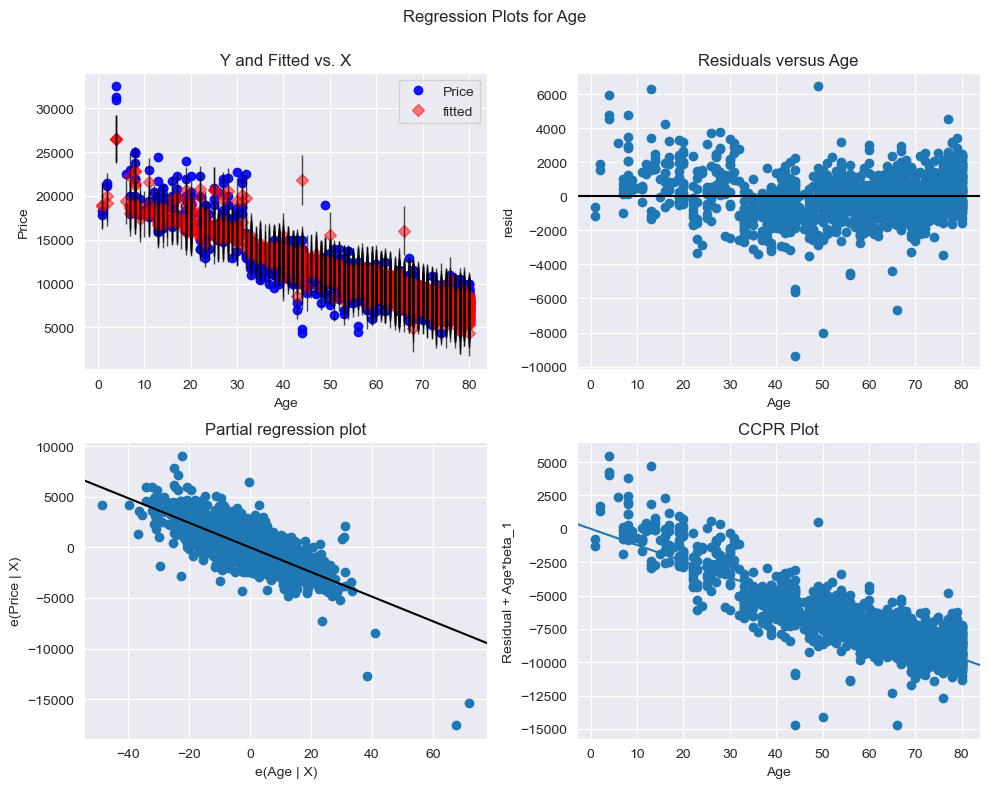

In [33]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, 'Age', fig=fig)
plt.show()

eval_env: 1


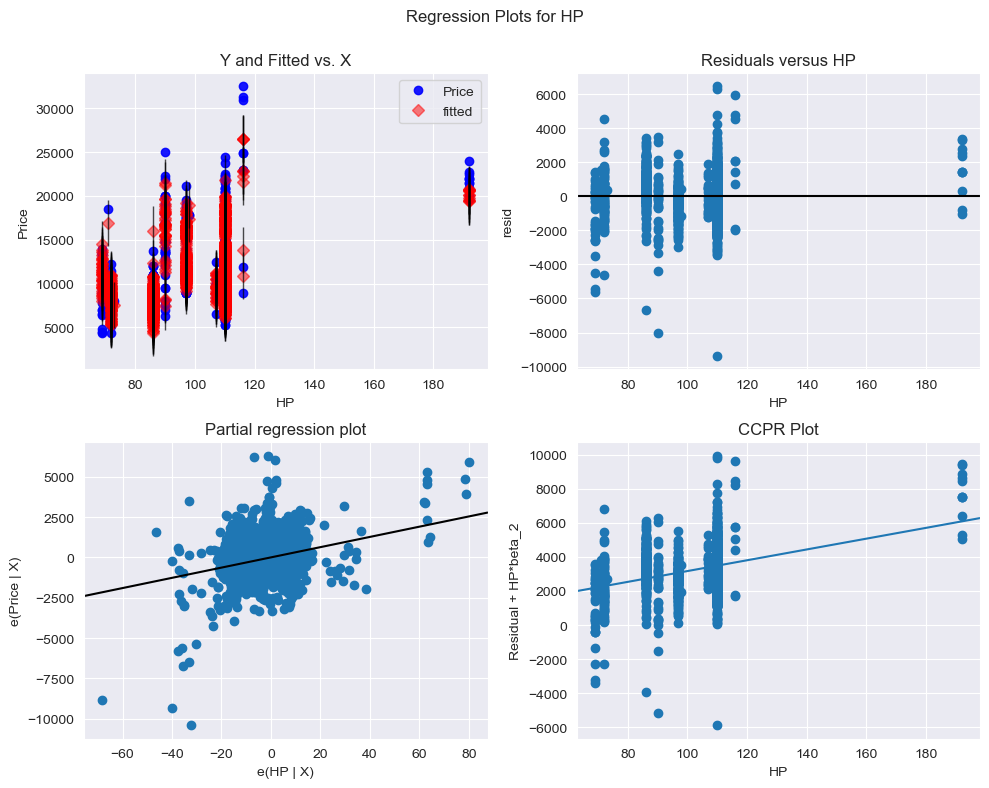

In [34]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

eval_env: 1


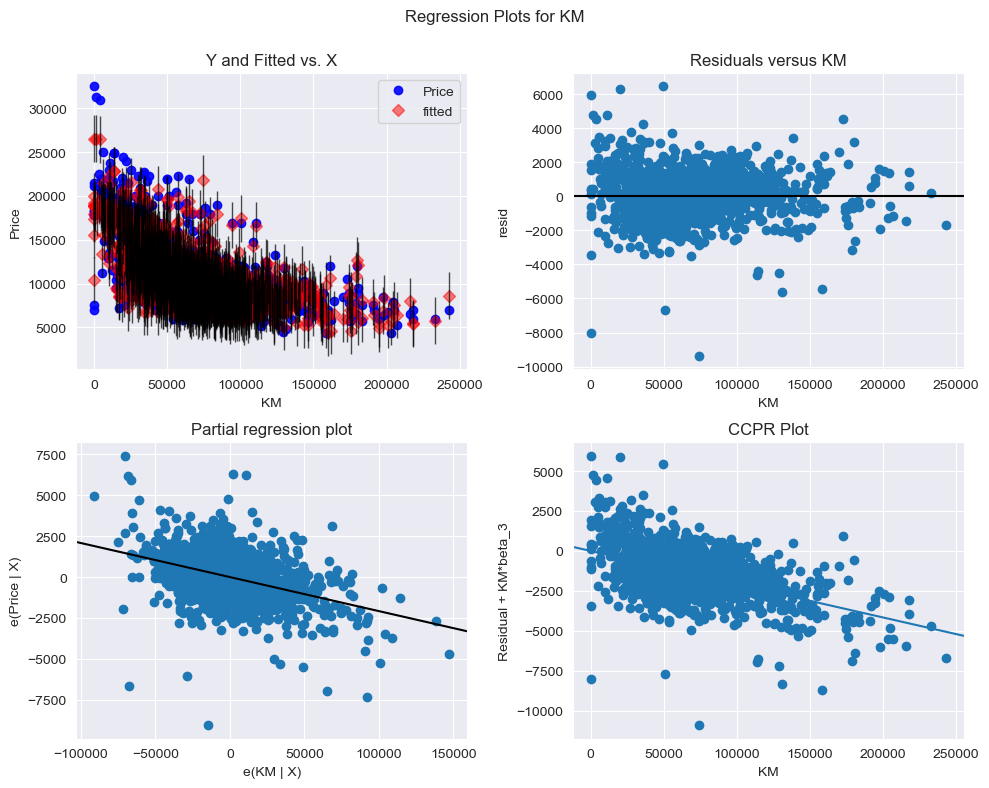

In [35]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)
plt.show()

eval_env: 1


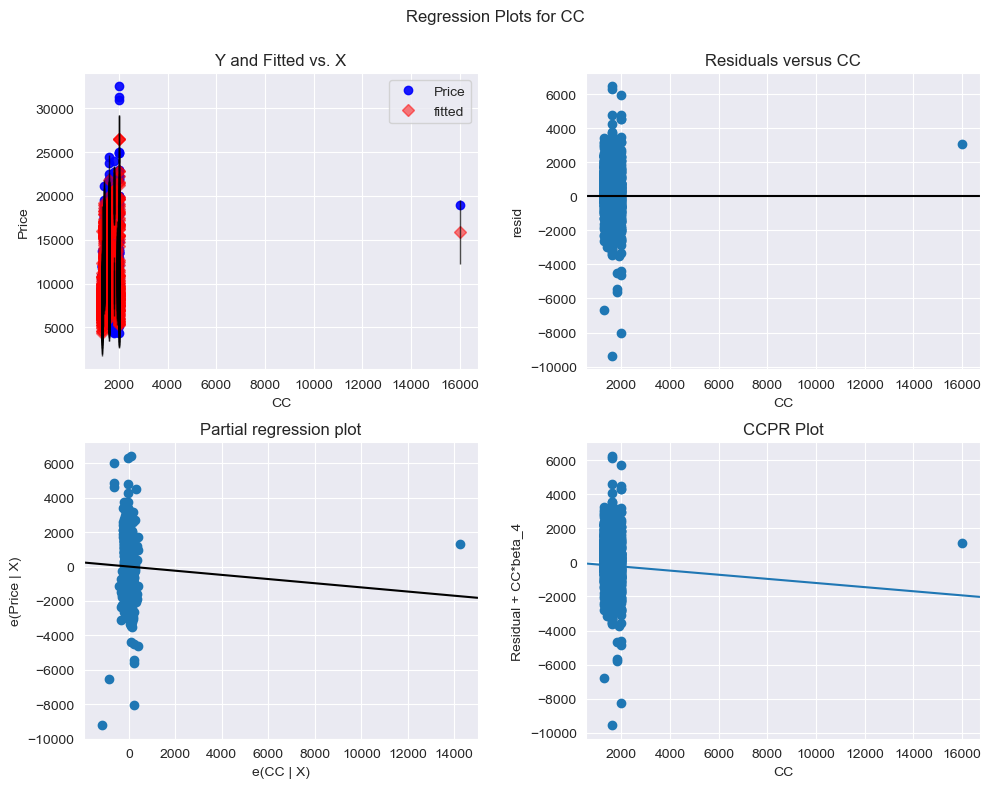

In [36]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

eval_env: 1


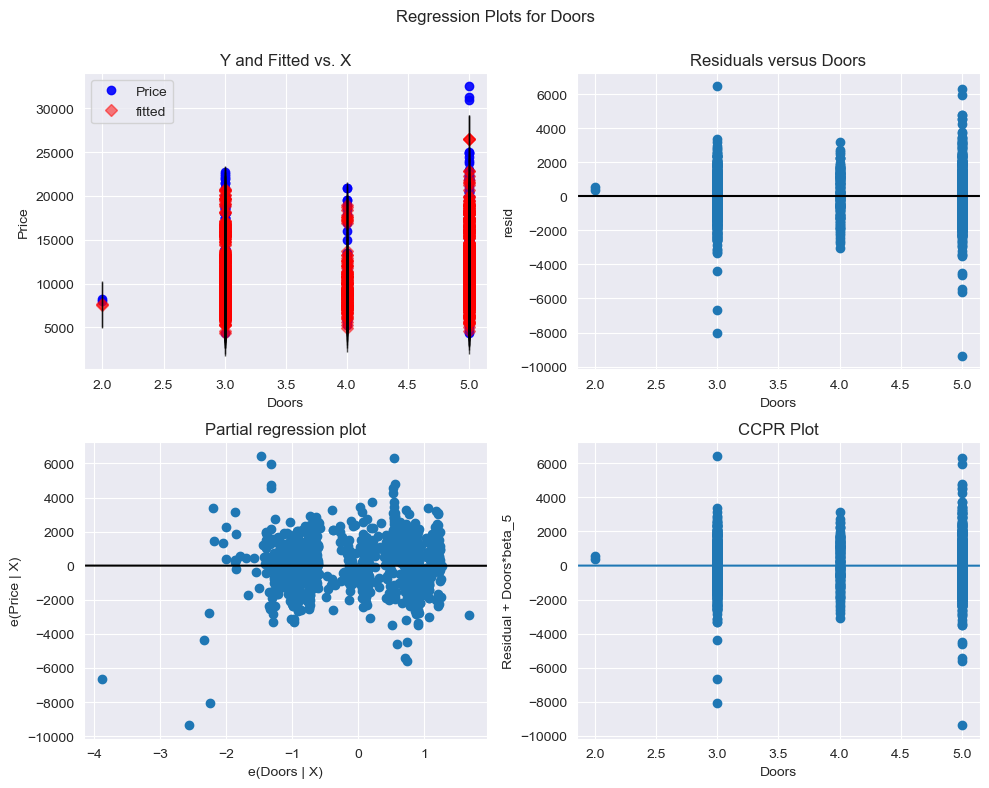

In [37]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

eval_env: 1


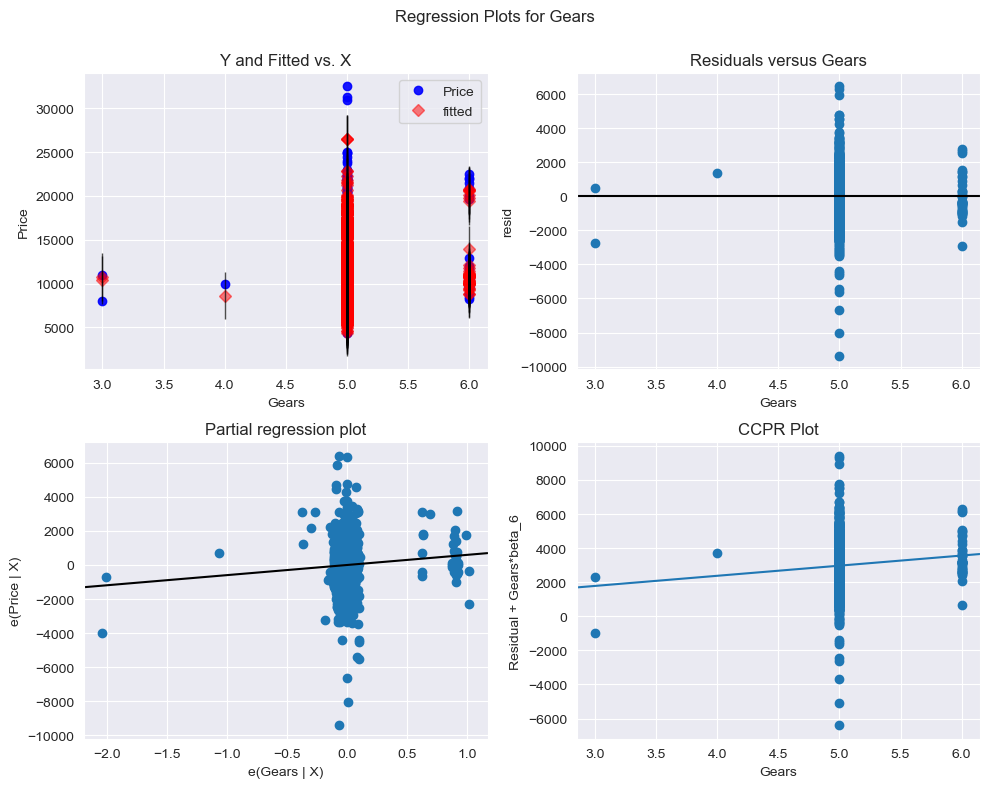

In [38]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

eval_env: 1


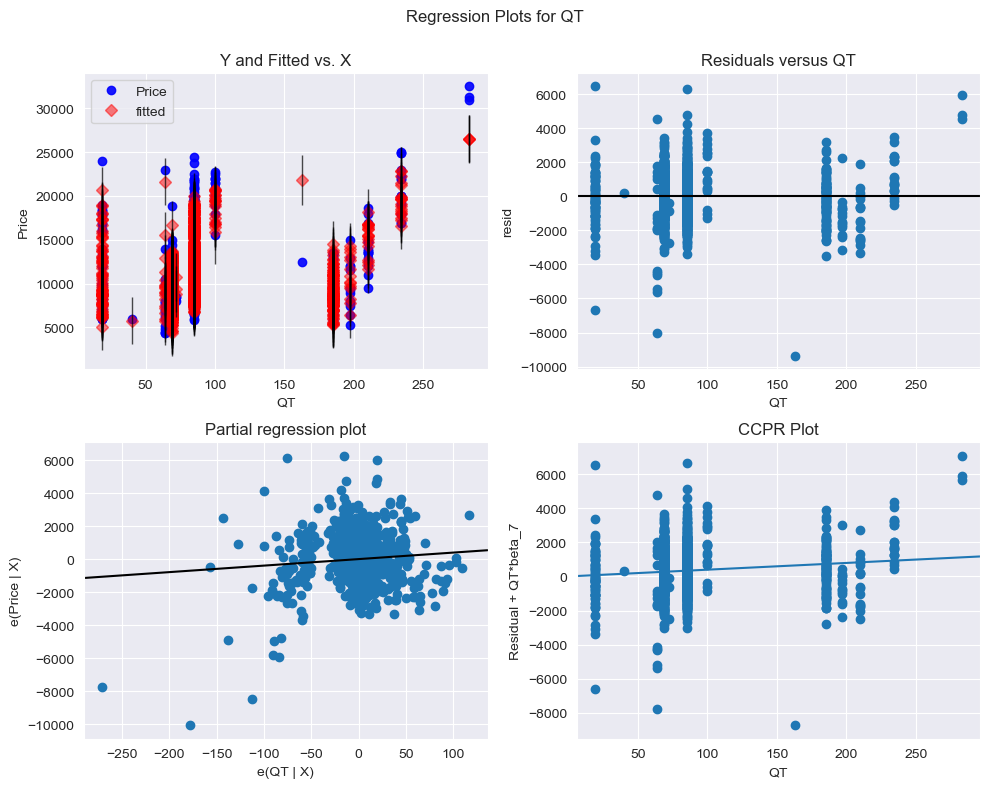

In [39]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

eval_env: 1


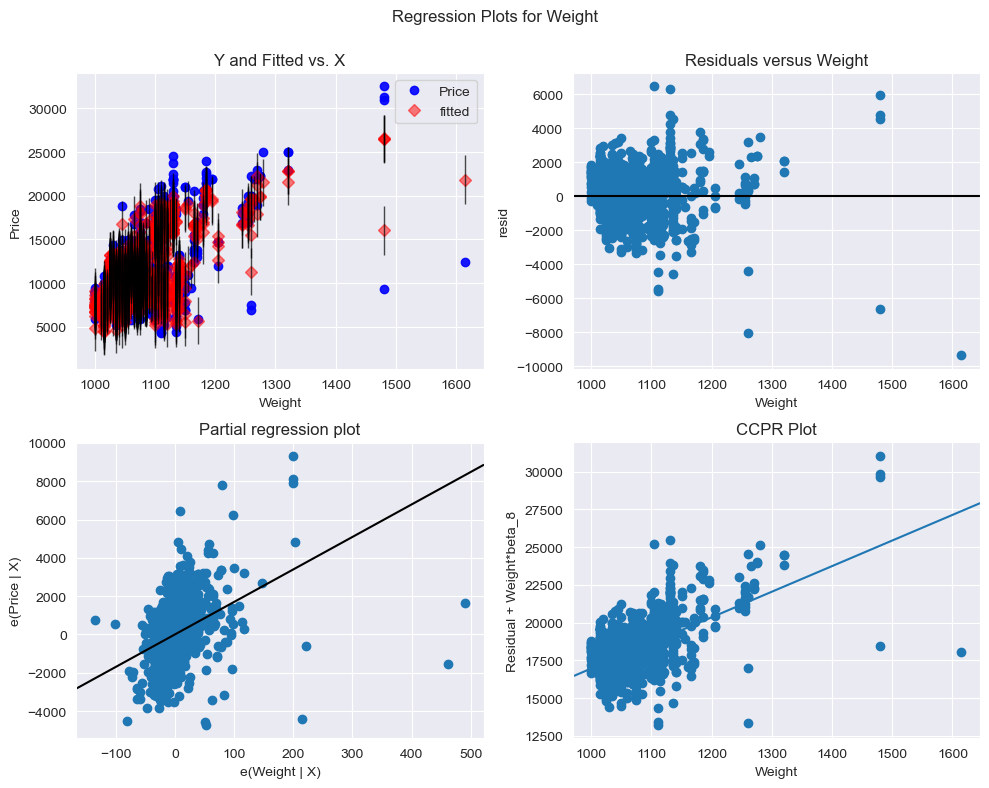

In [40]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

# model deletion diagnostics

In [41]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

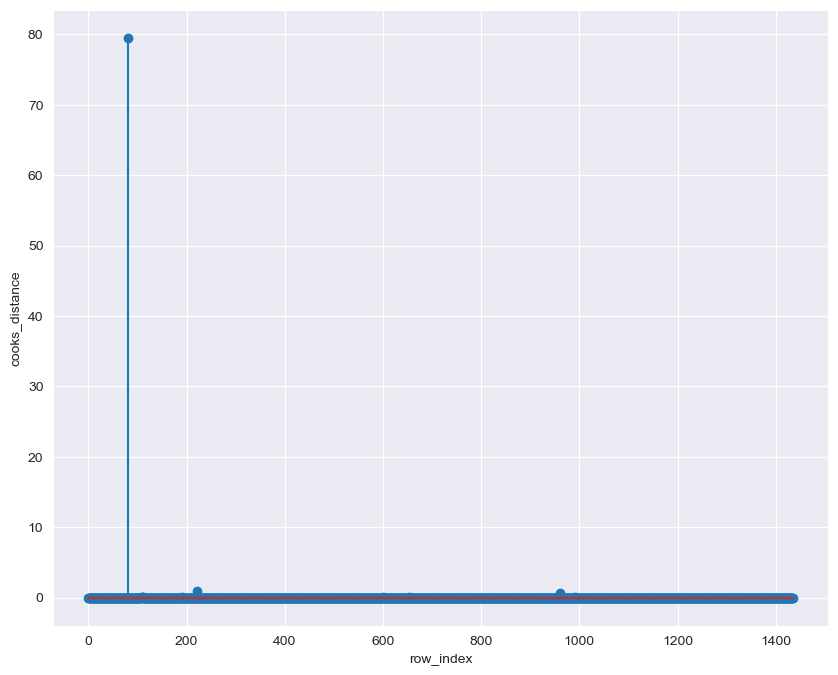

In [42]:
fig = plt.figure(figsize=(10,8))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('row_index')
plt.ylabel('cooks_distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(80, 79.52010624145157)

# high influence plots

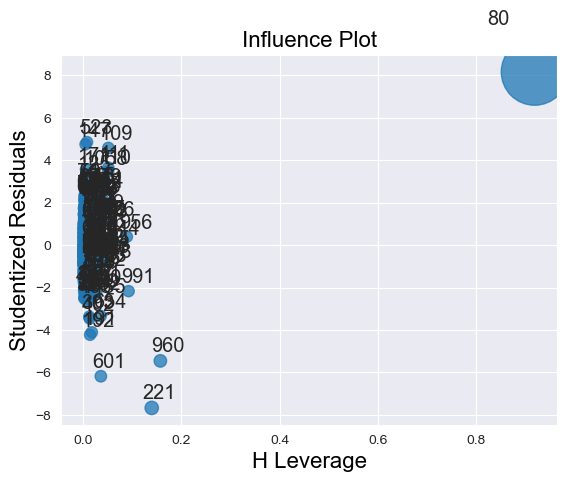

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [45]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [46]:
df[df.index.isin([80])]

,Price,Age_08_04,HP,KM,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,110,20019,16000,5,5,100,1180


# improving model

In [47]:
df_new = data.copy()
df_new

,Price,Age,HP,KM,CC,Doors,Gears,QT,Weight
0,13500,23,90,46986,2000,3,5,210,1165
1,13750,23,90,72937,2000,3,5,210,1165
2,13950,24,90,41711,2000,3,5,210,1165
3,14950,26,90,48000,2000,3,5,210,1165
4,13750,30,90,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,86,20544,1300,3,5,69,1025
1432,10845,72,86,19000,1300,3,5,69,1015
1433,8500,71,86,17016,1300,3,5,69,1015
1434,7250,70,86,16916,1300,3,5,69,1015


In [48]:
carl = df_new.drop(df_new.index[[80]],axis = 0).reset_index(0)


In [49]:
carl = carl.drop(["index"],axis =1 )

In [50]:
carl

,Price,Age,HP,KM,CC,Doors,Gears,QT,Weight
0,13500,23,90,46986,2000,3,5,210,1165
1,13750,23,90,72937,2000,3,5,210,1165
2,13950,24,90,41711,2000,3,5,210,1165
3,14950,26,90,48000,2000,3,5,210,1165
4,13750,30,90,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,86,20544,1300,3,5,69,1025
1431,10845,72,86,19000,1300,3,5,69,1015
1432,8500,71,86,17016,1300,3,5,69,1015
1433,7250,70,86,16916,1300,3,5,69,1015


# build model

In [52]:
while np.max(c)>0.5:
    model = smf.ols('Price~Age+HP+KM+CC+Doors+Gears+QT+Weight',data = carl ).fit()
    (c,_)= model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    carl = carl.drop(carl.index[[np.argmax(c)]],axis = 0).reset_index(drop=True)
    carl
else:
    final_model=smf.ols('Price~Age+HP+KM+CC+Doors+Gears+QT+Weight',data = carl ).fit()
    final_model.rsquared,final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8894191849749751


In [55]:
if np.max(c)>0.5:
    model = smf.ols('Price~Age+HP+KM+CC+Doors+Gears+QT+Weight',data = carl ).fit()
    (c,_)= model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    carl = carl.drop(carl.index[[np.argmax(c)]],axis = 0).reset_index(drop=True)
    carl
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+HP+KM+CC+Doors+Gears+QT+Weight',data = carl ).fit()
    final_model.rsquared,final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8894191849749751


In [56]:
final_model.rsquared

0.8894191849749751

In [57]:
carl

,Price,Age,HP,KM,CC,Doors,Gears,QT,Weight
0,13500,23,90,46986,2000,3,5,210,1165
1,13750,23,90,72937,2000,3,5,210,1165
2,13950,24,90,41711,2000,3,5,210,1165
3,14950,26,90,48000,2000,3,5,210,1165
4,13750,30,90,38500,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,86,20544,1300,3,5,69,1025
1428,10845,72,86,19000,1300,3,5,69,1015
1429,8500,71,86,17016,1300,3,5,69,1015
1430,7250,70,86,16916,1300,3,5,69,1015


# model predictions

In [64]:
new_data = pd.DataFrame({'Age':12,'HP':80,'KM':40000,'CC':1300,'Doors':4,'Gears':5,'QT':69,'Weight':1012},index=[1])
new_data

,Age,HP,KM,CC,Doors,Gears,QT,Weight
1,12,80,40000,1300,4,5,69,1012


In [65]:
final_model.predict(new_data)

1    14337.947064
dtype: float64

In [66]:
pred_y = final_model.predict(carl)

In [67]:
pred_y

0       16351.012991
1       15891.824421
2       16334.021007
3       16002.080259
4       15889.835926
            ...     
1427     9161.797882
1428     8536.169181
1429     8681.605150
1430     8793.704782
1431    10863.423359
Length: 1432, dtype: float64